<a href="https://colab.research.google.com/github/akki-kittu/SML_2303A52027/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
df = pd.read_csv("/content/drive/MyDrive/archive (1).zip")
df

,Heart_Rate_Variability,Body_Temperature,Movement_During_Sleep,Sleep_Duration_Hours,Sleep_Quality_Score,Caffeine_Intake_mg,Stress_Level,Bedtime_Consistency,Light_Exposure_hours
0,79.934283,37.199678,1.324822,4.638289,1.000000,107.624032,2.771837,0.657037,7.933949
1,67.234714,36.962317,1.855481,6.209422,1.000000,104.658589,3.738138,0.144464,6.992699
2,82.953771,36.529815,1.207580,6.879592,10.000000,0.000000,3.115880,0.642949,7.655250
3,100.460597,36.176532,1.692038,10.331531,1.000000,116.990981,3.904008,0.453255,9.429463
4,65.316933,36.849112,0.106385,8.334830,1.000000,223.282908,4.571699,0.641492,10.555713
...,...,...,...,...,...,...,...,...,...
995,64.377994,37.035075,2.077481,7.542686,1.000000,167.146932,4.404266,0.941971,8.203260
996,105.953731,36.486739,2.257753,4.383282,1.000000,265.264810,6.538063,0.565399,10.334435
997,82.816857,36.059063,0.758239,7.019553,8.445252,28.259621,3.945222,0.332975,11.176894
998,58.576420,36.418467,2.334176,9.965067,1.000000,196.795042,4.989787,0.830583,6.630026


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Heart_Rate_Variability  1000 non-null   float64
 1   Body_Temperature        1000 non-null   float64
 2   Movement_During_Sleep   1000 non-null   float64
 3   Sleep_Duration_Hours    1000 non-null   float64
 4   Sleep_Quality_Score     1000 non-null   float64
 5   Caffeine_Intake_mg      1000 non-null   float64
 6   Stress_Level            1000 non-null   float64
 7   Bedtime_Consistency     1000 non-null   float64
 8   Light_Exposure_hours    1000 non-null   float64
dtypes: float64(9)
memory usage: 70.4 KB


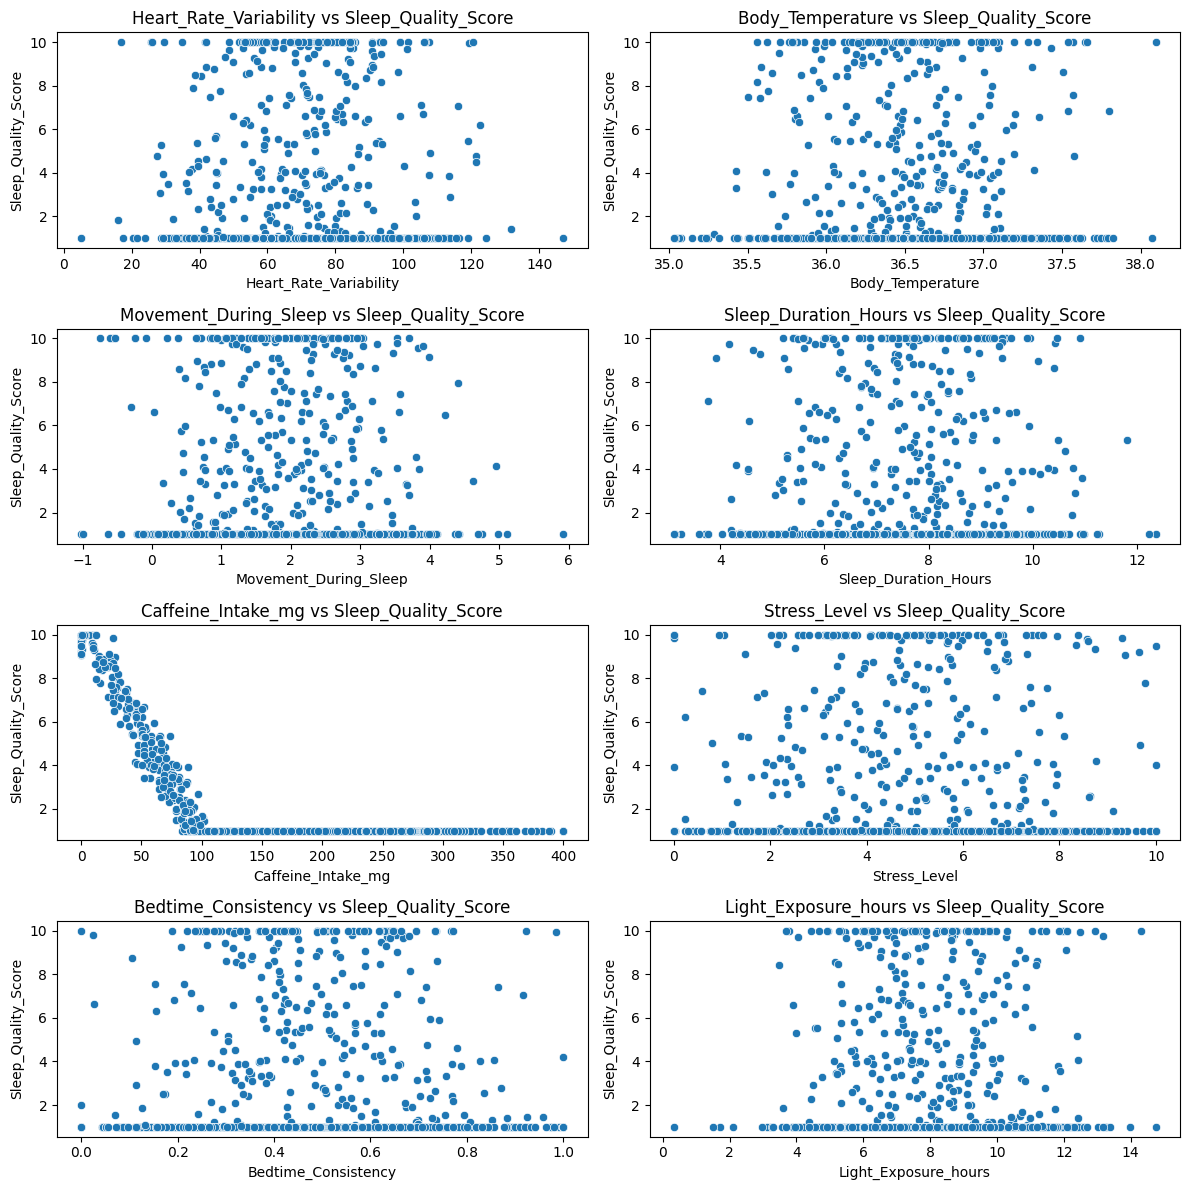

In [5]:
rows, cols_layout = 4, 2
fig, axes = plt.subplots(rows, cols_layout, figsize=(12, 12))
axes = axes.flatten()

cols = [col for col in df.columns.to_list() if col != 'Sleep_Quality_Score']

for i, col in enumerate(cols):
    if i < len(axes):
        sns.scatterplot(x=col, y='Sleep_Quality_Score', data=df, ax=axes[i])
        axes[i].set_title(f'{col} vs Sleep_Quality_Score')

plt.tight_layout()
plt.show()


In [6]:
corr_matrix = df.corr()
corr_matrix

,Heart_Rate_Variability,Body_Temperature,Movement_During_Sleep,Sleep_Duration_Hours,Sleep_Quality_Score,Caffeine_Intake_mg,Stress_Level,Bedtime_Consistency,Light_Exposure_hours
Heart_Rate_Variability,1.000000,-0.040400,0.022129,-0.013321,0.026911,-0.008619,-0.035387,0.048199,-0.016585
Body_Temperature,-0.040400,1.000000,-0.011199,-0.054698,-0.025720,0.024757,-0.001531,0.054962,0.012436
Movement_During_Sleep,0.022129,-0.011199,1.000000,0.021586,-0.064108,0.002097,-0.028713,-0.039408,0.001739
Sleep_Duration_Hours,-0.013321,-0.054698,0.021586,1.000000,0.042104,0.033951,0.011492,-0.002974,0.004894
Sleep_Quality_Score,0.026911,-0.025720,-0.064108,0.042104,1.000000,-0.721968,-0.036226,-0.076633,-0.007448
Caffeine_Intake_mg,-0.008619,0.024757,0.002097,0.033951,-0.721968,1.000000,0.013555,0.056263,0.011756
Stress_Level,-0.035387,-0.001531,-0.028713,0.011492,-0.036226,0.013555,1.000000,-0.004930,-0.001623
Bedtime_Consistency,0.048199,0.054962,-0.039408,-0.002974,-0.076633,0.056263,-0.004930,1.000000,0.026786
Light_Exposure_hours,-0.016585,0.012436,0.001739,0.004894,-0.007448,0.011756,-0.001623,0.026786,1.000000


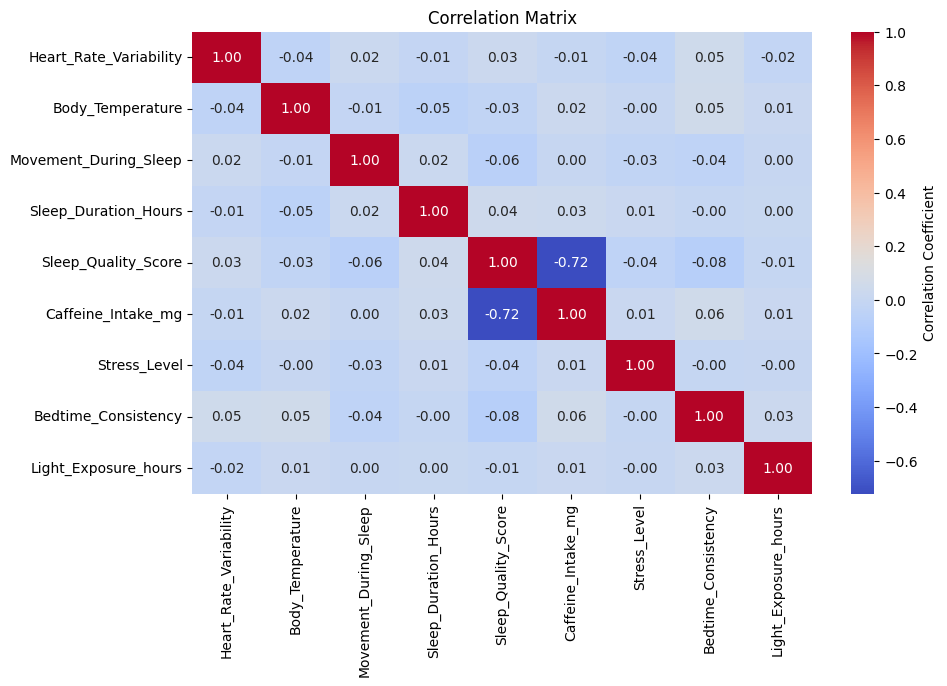

In [7]:
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, fmt=".2f", cmap='coolwarm', cbar_kws={'label': 'Correlation Coefficient'}, annot= True)
plt.title('Correlation Matrix')
plt.show()

In [8]:
np.random.seed(42)

X = df.drop(columns=['Sleep_Quality_Score'])
y = df['Sleep_Quality_Score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')



Mean Squared Error: 3.932964456322624
R-squared: 0.5476936815546471
